In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data
train = pd.read_csv('C:/Users/Shendy/Desktop/Project_Draft/ToxiCommentClassification/train.csv')
test = pd.read_csv('C:/Users/Shendy/Desktop/Project_Draft/ToxiCommentClassification/test.csv')

In [3]:
print('Train data shape:', train.shape)
print('Name of columns in Train:', train.columns)

Train data shape: (159571, 8)
Name of columns in Train: Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


###### -Toxic: All other categories, like, ‘sorry’, ‘thanks’ or any general discussion fell under toxic class. This made one to be difficult to find a particular pattern and hence to classify it properly.
###### -Severe Toxic: The text containing offensive and hurtful words
###### -Threat: If a text contains words like ‘kill’, ‘shoot’, ‘murder’, or ‘gun’
###### -Identity-hate: If a text points out at some community or a religion, like, ‘Nigerian', 'Jews', 'Muslim' or 'gay'
###### -Obscene: The text containing vulgar and offensive words was labeled as obscene.
###### -Insult: the texts containing a noun or a pronoun together with vulgar or offensive or hurtful words


###### The provided train.csv is having 159571 rows and 8 columns. Let us now sample to take 5 rows from the data to get visual understanding of what is present.


In [4]:
train.sample(10, random_state = 1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24915,41e65f43c180838e,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1,1,1,0,1,0
75819,cade9e425d75948e,Agent X2: Basically thanks - with a 'little' m...,0,0,0,0,0,0
53891,8ff87747403ed2e6,Why are my posts being deleted? \n\nI have tri...,0,0,0,0,0,0
154159,a95604c7a938abb3,"""\n\n Controlled Demolitions and Common Sense ...",0,0,0,0,0,0
13040,2288910537399728,I do not understand your reply. //Blaxthos ( ...,0,0,0,0,0,0
123190,9309014f225e9975,Is this the bizarro world? Removing content is...,0,0,0,0,0,0
33626,59a295885d985ef1,"Well, WP:RS says that articles should use reli...",0,0,0,0,0,0
1150,031c15507901e54a,Oh hear me go someone removes all my pages i g...,0,0,0,0,0,0
48633,820b548b9acc1ee6,can't believe this article was deleted\nI'm su...,0,0,0,0,0,0
42817,723d53b4406dc45a,"""\n\n Comments on GamerGate Workshop page \n\n...",0,0,0,0,0,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 17 columns):
id                     159571 non-null object
comment_text           159571 non-null object
toxic                  159571 non-null int64
severe_toxic           159571 non-null int64
obscene                159571 non-null int64
threat                 159571 non-null int64
insult                 159571 non-null int64
identity_hate          159571 non-null int64
clean_comment          159571 non-null int64
total_len              159571 non-null int64
sent_count             159571 non-null int64
word_count             159571 non-null int64
capitals               159571 non-null int64
punct_count            159571 non-null int64
smilies_count          159571 non-null int64
unique_word_count      159571 non-null int64
unique_word_percent    159571 non-null float64
dtypes: float64(1), int64(14), object(2)
memory usage: 20.7+ MB


- This is going to be text classification problem...we are given a comment and we need to classify whether it is toxic.
- The column `comment_text` contains the comments text and it will be our main feature.
- All the remaining columns except `id` will be our target variable to predict.
- Target varaibles are binary encoded (one hot encoded) & all zeros represents a clean comment.
- A single comments can belong to multiple toxicity classes

Now lets look into few complete random comments from the data

<h2>Now lets look into few complete random comments from the data:</h2>

In [5]:
for i in [34, 55345, 124786]:
    print(train.loc[i, 'comment_text'])

"
Well, not ""before the process"" but ""before how we do things with subpages"" His RfA is listed on NoSeptember's page and you can find it if you look. September 2004 I think. I have my differences with El_C to be sure, but was surprised to see a block, so I left a note. ++: t/c "
They are deletionists.
Hello 

Hello, I'm Irene.

I created See Me novel from Nicholas Sparks. I created it because I saw Nicholas Spark's official website about a new novel released coming soon. I ask you, is this page wrong or anything?

Thanks.


<h5>Clearly, comments are largely varying in lengths. Let us see how their distrubution looks like<\h5>

In [6]:
train['comment_text'].str.len().describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BF2F53AC8>,
      dtype=object)

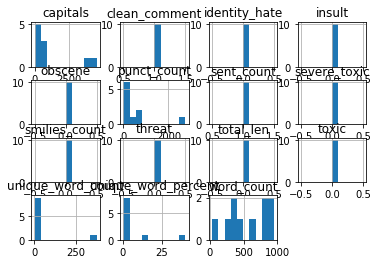

In [59]:
train[(train['comment_text'].str.len() == 5000) & (train['toxic'] == 0) & (train['severe_toxic'] == 0) & (train['obscene'] == 0) & (train['threat'] == 0) & (train['insult'] == 0) & (train['identity_hate'] == 0)]

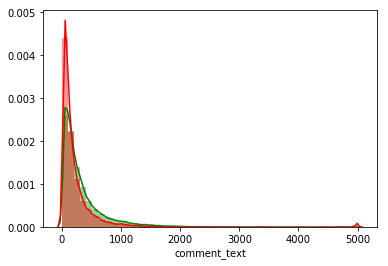

In [74]:
bersih = train[(train['toxic'] == 0) & (train['severe_toxic'] == 0) & (train['obscene'] == 0) & (train['threat'] == 0) & (train['insult'] == 0) & (train['identity_hate'] == 0)]['comment_text'].apply(len)
kotor = train[(train['toxic'] == 1) | (train['severe_toxic'] == 1) | (train['obscene'] == 1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] == 1)]['comment_text'].apply(len)

#y = train['comment_text'].apply(len)
sns.distplot(bersih, kde = True, color = 'green')
sns.distplot(kotor, kde = True, color = 'red')

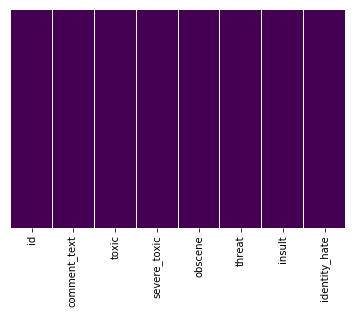

In [7]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap='viridis')

- Comments have no null values.

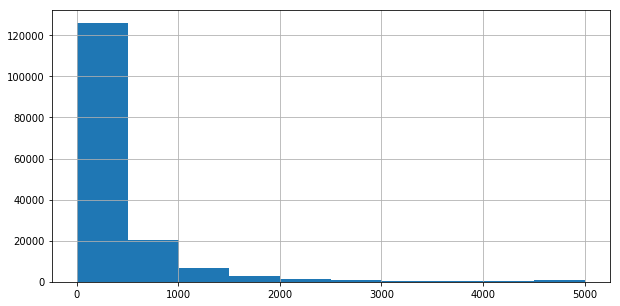

In [8]:
# Data Distribution
comment_len = train['comment_text'].str.len()
ax = comment_len.hist(figsize = (10,5))
ax

From the above outputs we can say these points:
- Mininum length of a comment is only 6 chars while maximum length can be 5000 characters.
- Mean (394 chars) and median (205 chars) are not close indicating the skewness - as a result histogram is left sided

Now we will look how many of given comments are clean & how many are toxic (in other words, distrubution of classes to be predicted)

In [9]:
drop_col = ['id', 'clean_comment'] ## columns not neccessary - can be dropped
text_col = ['comment_text'] ## text feature
label_col = [col for col in train.columns if col not in text_col + drop_col] #target variables

labels_per_comment = train[label_col].sum(axis = 1) ## no.of labels for each comment
## add a new column to indicate if a comment is toxic (bad) or not (clean).

train['clean_comment'] = 0
train.loc[labels_per_comment == 0, 'clean_comment'] = 1
# train['clean_comment'].value_counts()

print("Total Clean comments (All 0's in a target row) in train:",len(train[train['clean_comment'] == 1]))
print("Total toxic comments (atleast one 1 in a target row)in train:",len(train[train['clean_comment'] != 1]))
print("Total label tags (total counts of 1's in target columns):",train[label_col].sum().sum())

Total Clean comments (All 0's in a target row) in train: 143346
Total toxic comments (atleast one 1 in a target row)in train: 16225
Total label tags (total counts of 1's in target columns): 35098


Importantly we need to notice that total bad comments & total label tags are not equal, so said intially there are multiple labels for many comments. On Average, there are 2 labels for each comment - but let us see - Now let us see how multiple labels are divided:   

In [10]:
tags_count = labels_per_comment.value_counts()
tags_count
#tags_count.index
#tags_count.values

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

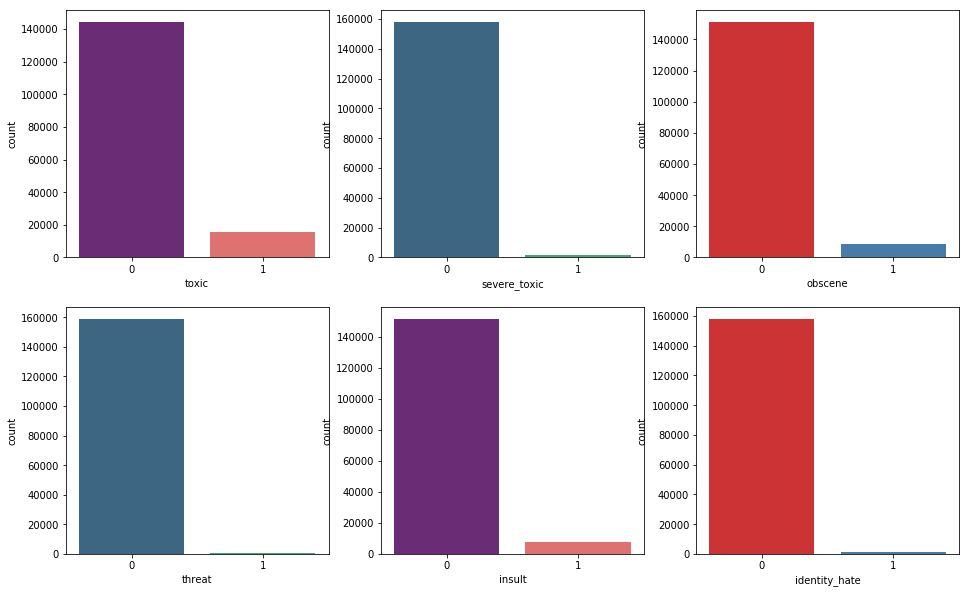

In [11]:
# Clean vs Unclean per class
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6)
plt.show()

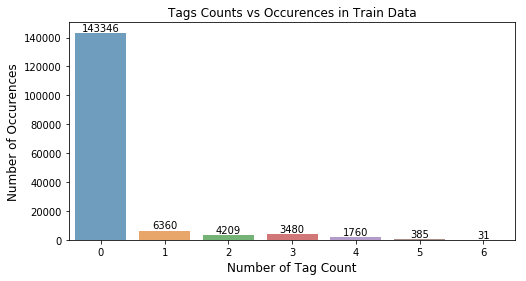

In [12]:
# plotting the label counts
plt.figure(figsize = (8,4))
ax = sns.barplot(tags_count.index, tags_count.values, alpha = 0.7)
#ax
plt.title('Tags Counts vs Occurences in Train Data')
plt.ylabel('Number of Occurences', fontsize = 12)
plt.xlabel('Number of Tag Count', fontsize = 12)

# adding the text labels
rects = ax.patches
labels = tags_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(rect.get_x() + width/2, height, label, ha = 'center', va  ='bottom')
plt.show()   

In [76]:
train[(train['toxic'] == 1) & (train['severe_toxic'] == 1) & (train['obscene'] == 1) & (train['insult'] == 1) & (train['identity_hate'] == 1) & (train['threat'] == 1)]['comment_text'].iloc[0]

"WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER."

- maximum no.of tags for a bad comment is 6 (i.e it will belong to all six classes).
- This we can be viewed as highericial tagging. (Ex: A comment which is `severe_toxic` will be also a `toxic`).

Lets visualize how the main six classes are distributed (counts of classes) among the 35098 occurences

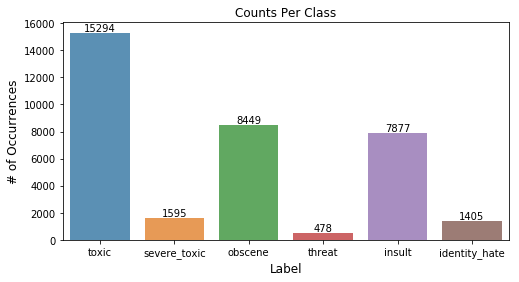

In [77]:
label_counts = train[label_col].sum()
#label_counts

# plotting the label counts
plt.figure(figsize = (8,4))
ax = sns.barplot(label_counts.index, label_counts.values, alpha = 0.8)
plt.title('Counts Per Class')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)

#adding the text labels
rects = ax.patches
labels = label_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, 
            label, ha='center', va='bottom')
plt.show()

In [89]:
train[(train['toxic'] == 0) &  ((train['obscene'] == 1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] == 1))].sum()

id                     006d11791d76b9f301625cc84c6ef15b01ccf4d20d31df...
comment_text           REPLY ABOVE:\nThat was me, loser. The UN defin...
toxic                                                                  0
severe_toxic                                                           0
obscene                                                              523
threat                                                                29
insult                                                               533
identity_hate                                                        103
clean_comment                                                          0
total_len                                                         405615
sent_count                                                          3731
word_count                                                         70919
capitals                                                           21508
punct_count                                        

In [98]:
#train['comment_text'].str.contains('balls')
train[train['comment_text'].str.contains('BALLS')].loc[8705][['comment_text','obscene']]


comment_text    BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALL...
obscene                                                         0
Name: 8705, dtype: object

The above figure tells us that Toxicity type is not evenly spreadout - `toxic` comments are more common while `threat` is least occuring class. This is interesting & a bit scary too. In total, there is a high imbalance b/w the clean & unclean comments. Again with in unclean comments, there is imbalance b/w the types of toxicity!

Till now we only analyzed the target varaibles, now we will look at one comment each from the all 6 types of toxic classes.

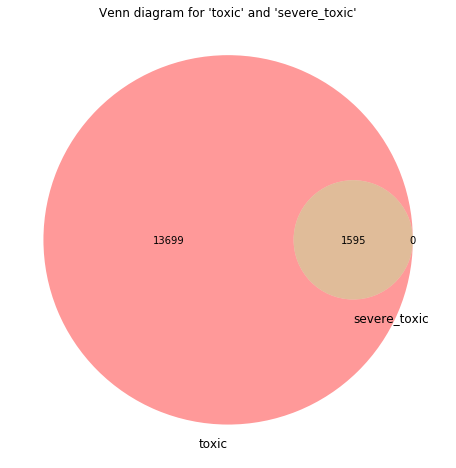

In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

t = train[(train['toxic'] == 1) & (train['severe_toxic'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['severe_toxic'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()

##### The 'severe_toxic' category is completely contained in 'toxic'

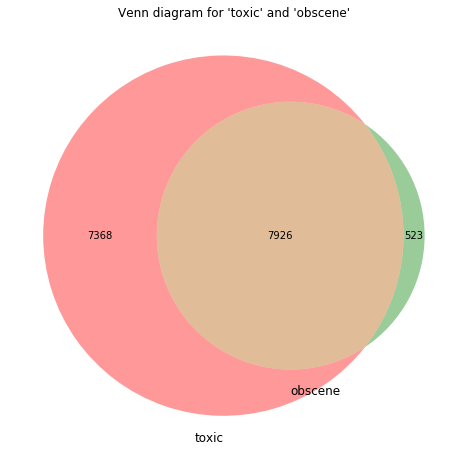

In [15]:
t = train[(train['toxic'] == 1) & (train['obscene'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['obscene'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'obscene'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'obscene'))
plt.show()

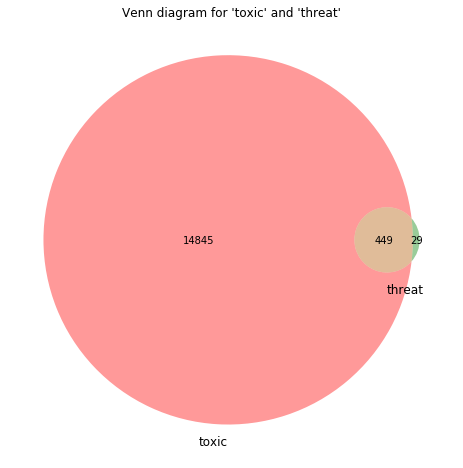

In [16]:
t = train[(train['toxic'] == 1) & (train['threat'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['threat'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['threat'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'threat'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'threat'))
plt.show()

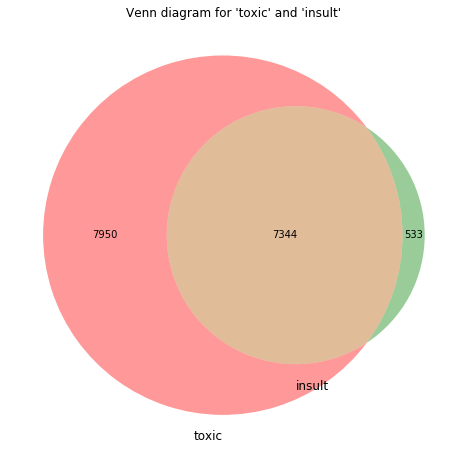

In [17]:
t = train[(train['toxic'] == 1) & (train['insult'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['insult'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['insult'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'insult'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'insult'))
plt.show()

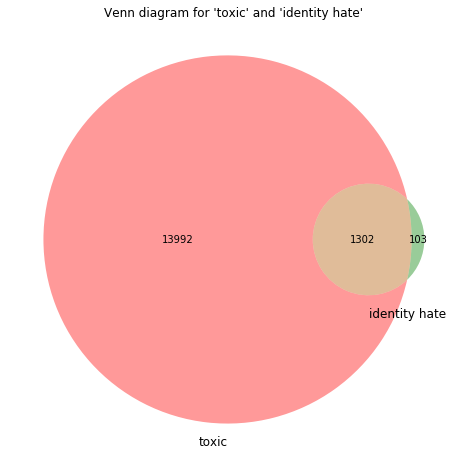

In [18]:
t = train[(train['toxic'] == 1) & (train['identity_hate'] == 0)].shape[0]
s = train[(train['toxic'] == 0) & (train['identity_hate'] == 1)].shape[0]

t_s = train[(train['toxic'] == 1) & (train['identity_hate'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'identity hate'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'identity hate'))
plt.show()

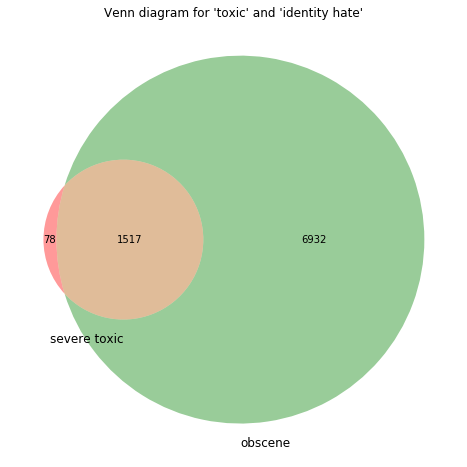

In [19]:
t = train[(train['severe_toxic'] == 1) & (train['obscene'] == 0)].shape[0]
s = train[(train['severe_toxic'] == 0) & (train['obscene'] == 1)].shape[0]

t_s = train[(train['severe_toxic'] == 1) & (train['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'identity hate'")
venn2(subsets = (t, s, t_s), 
      set_labels=('severe toxic', 'obscene'))
plt.show()

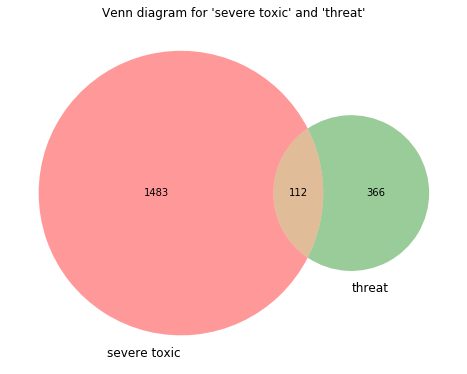

In [20]:
t = train[(train['severe_toxic'] == 1) & (train['threat'] == 0)].shape[0]
s = train[(train['severe_toxic'] == 0) & (train['threat'] == 1)].shape[0]

t_s = train[(train['severe_toxic'] == 1) & (train['threat'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'severe toxic' and 'threat'")
venn2(subsets = (t, s, t_s), 
      set_labels=('severe toxic', 'threat'))
plt.show()

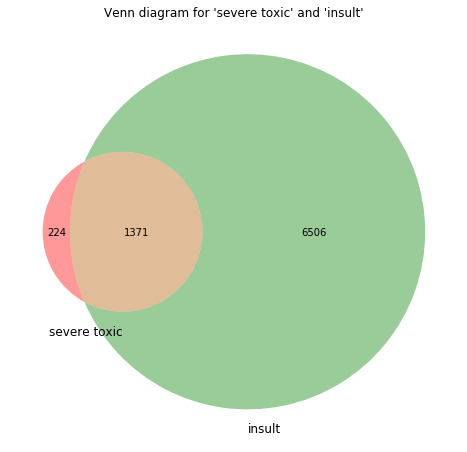

In [21]:
t = train[(train['severe_toxic'] == 1) & (train['insult'] == 0)].shape[0]
s = train[(train['severe_toxic'] == 0) & (train['insult'] == 1)].shape[0]

t_s = train[(train['severe_toxic'] == 1) & (train['insult'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'severe toxic' and 'insult'")
venn2(subsets = (t, s, t_s), 
      set_labels=('severe toxic', 'insult'))
plt.show()

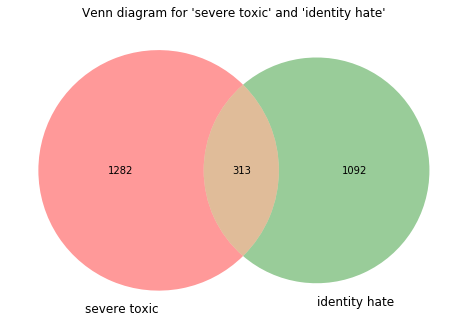

In [22]:
t = train[(train['severe_toxic'] == 1) & (train['identity_hate'] == 0)].shape[0]
s = train[(train['severe_toxic'] == 0) & (train['identity_hate'] == 1)].shape[0]

t_s = train[(train['severe_toxic'] == 1) & (train['identity_hate'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'severe toxic' and 'identity hate'")
venn2(subsets = (t, s, t_s), 
      set_labels=('severe toxic', 'identity hate'))
plt.show()

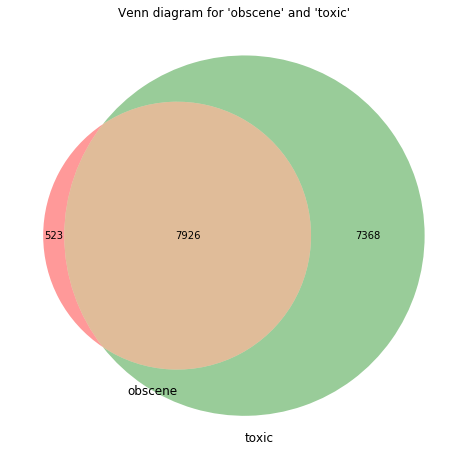

In [23]:
t = train[(train['obscene'] == 1) & (train['toxic'] == 0)].shape[0]
s = train[(train['obscene'] == 0) & (train['toxic'] == 1)].shape[0]

t_s = train[(train['obscene'] == 1) & (train['toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'obscene' and 'toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('obscene', 'toxic'))
plt.show()

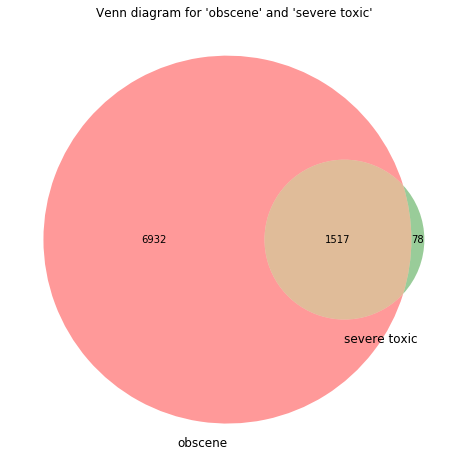

In [24]:
t = train[(train['obscene'] == 1) & (train['severe_toxic'] == 0)].shape[0]
s = train[(train['obscene'] == 0) & (train['severe_toxic'] == 1)].shape[0]

t_s = train[(train['obscene'] == 1) & (train['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'obscene' and 'severe toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('obscene', 'severe toxic'))
plt.show()

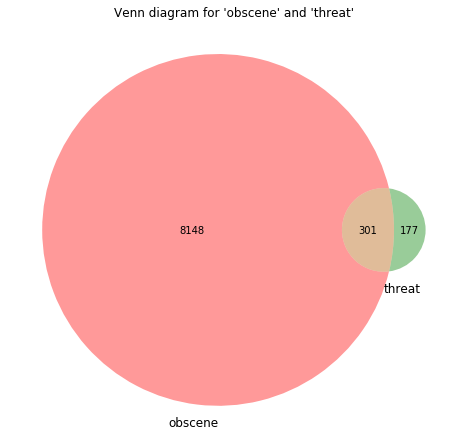

In [25]:
t = train[(train['obscene'] == 1) & (train['threat'] == 0)].shape[0]
s = train[(train['obscene'] == 0) & (train['threat'] == 1)].shape[0]

t_s = train[(train['obscene'] == 1) & (train['threat'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'obscene' and 'threat'")
venn2(subsets = (t, s, t_s), 
      set_labels=('obscene', 'threat'))
plt.show()

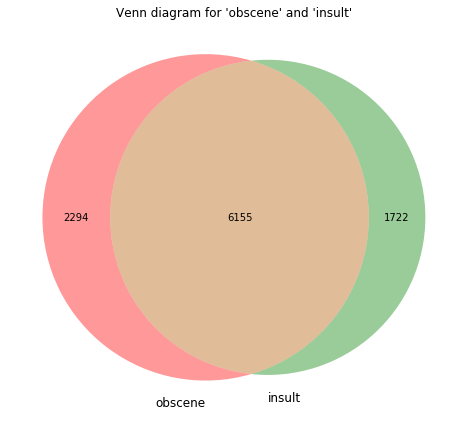

In [26]:
t = train[(train['obscene'] == 1) & (train['insult'] == 0)].shape[0]
s = train[(train['obscene'] == 0) & (train['insult'] == 1)].shape[0]

t_s = train[(train['obscene'] == 1) & (train['insult'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'obscene' and 'insult'")
venn2(subsets = (t, s, t_s), 
      set_labels=('obscene', 'insult'))
plt.show()

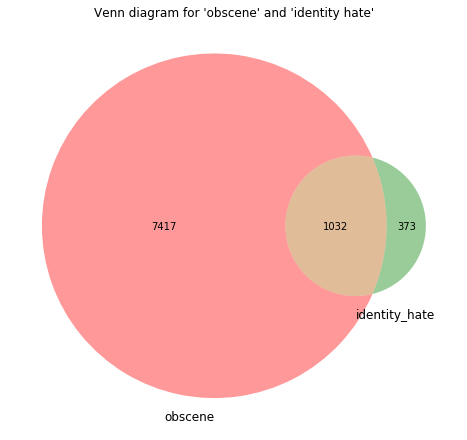

In [27]:
t = train[(train['obscene'] == 1) & (train['identity_hate'] == 0)].shape[0]
s = train[(train['obscene'] == 0) & (train['identity_hate'] == 1)].shape[0]

t_s = train[(train['obscene'] == 1) & (train['identity_hate'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'obscene' and 'identity hate'")
venn2(subsets = (t, s, t_s), 
      set_labels=('obscene', 'identity_hate'))
plt.show()

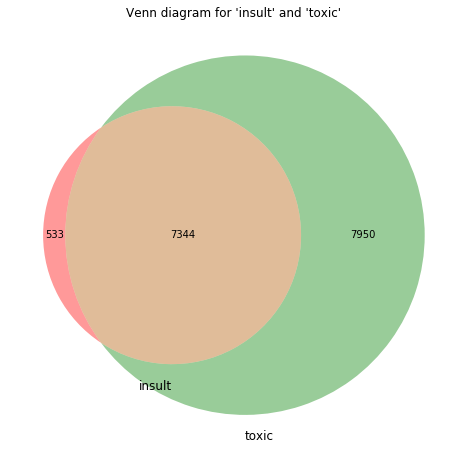

In [28]:
t = train[(train['insult'] == 1) & (train['toxic'] == 0)].shape[0]
s = train[(train['insult'] == 0) & (train['toxic'] == 1)].shape[0]

t_s = train[(train['insult'] == 1) & (train['toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'insult' and 'toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('insult', 'toxic'))
plt.show()

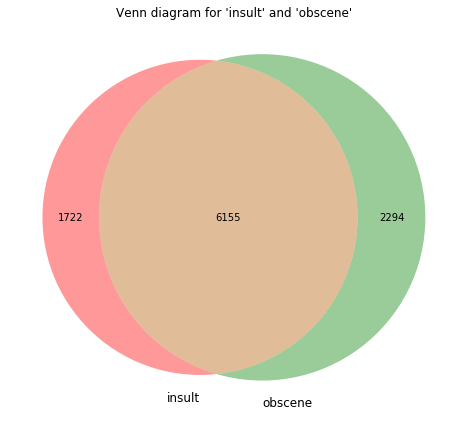

In [29]:
t = train[(train['insult'] == 1) & (train['obscene'] == 0)].shape[0]
s = train[(train['insult'] == 0) & (train['obscene'] == 1)].shape[0]

t_s = train[(train['insult'] == 1) & (train['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'insult' and 'obscene'")
venn2(subsets = (t, s, t_s), 
      set_labels=('insult', 'obscene'))
plt.show()

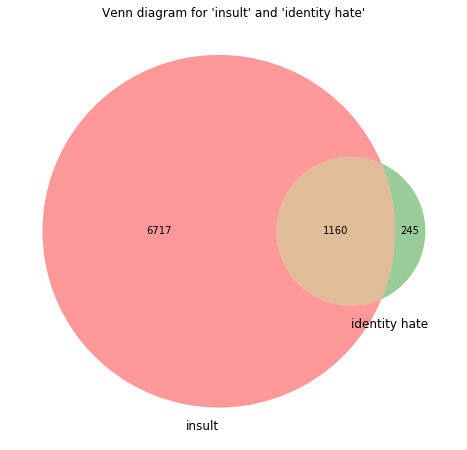

In [30]:
t = train[(train['insult'] == 1) & (train['identity_hate'] == 0)].shape[0]
s = train[(train['insult'] == 0) & (train['identity_hate'] == 1)].shape[0]

t_s = train[(train['insult'] == 1) & (train['identity_hate'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'insult' and 'identity hate'")
venn2(subsets = (t, s, t_s), 
      set_labels=('insult', 'identity hate'))
plt.show()

In [99]:
import random
#label_col
for label in label_col:
    label_df = train[train[label] == 1].reset_index(drop = 1)
    print('\n' + label + '- comment sample :')
    print(label_df.loc[random.randint(0, len(label_df)-1), 'comment_text'])
    print('\n' + '-'*50)


toxic- comment sample :
Stop being a Douchebag

I have made positive contributions to Wikipedia.  Don't be a dick and suggest that I should be blocked.  That is unjust.

--------------------------------------------------

severe_toxic- comment sample :
Those admins are fucking assholes, i just undid his removal of your text to his user page.  check out this page to learn how to get around themn

http://en.wikipedia.org/wiki/Wikipedia:VAN

especcially the sneaky edits part

--------------------------------------------------

obscene- comment sample :
What the fuck are you doing? 

Fucking asshole81.178.153.156

--------------------------------------------------

threat- comment sample :
If no-one beats me to it, I'll knock something up tonight.

--------------------------------------------------

insult- comment sample :
"

listen motherfucker YOU wrote on MY shit, if u dont want to be ""attacked"" keep off my page, god damn why dont u cry"

--------------------------------------------

- Comments are having puntuctions & things user want to highlight in captials (or) quotes.
- As usually, Contractions are always there. In some cases (very less), there is also text from other languages in b/w english.
- comments include lots of chatting/social shortcuts which we generally use on social media.
- few comments seems to contain numbers, time and also IP address (might be of user's).
- In few cases there are also Device Id's and Urls posted by users.
- Some comments are spam - repeating same things 10's of times.

Now, let us start exploring into comment texts with some questions which relates to our objective. Our objective here is to classify the bad comments into different to toxicity types.

- Are Longer comments more toxic ?
- did Presence of special characters vary with Toxicity ?
- Are spammer more toxic ?


These questions will answer how Toxicity of comments vary with different features of comment_text like length, presence of punctuations, capital letters, words, or sentences.

In [32]:
import re #regex
# Total chars:
train['total_len'] = train['comment_text'].apply(len)
test['total_len'] = test['comment_text'].apply(len)

# Sentence count in comment: '\n' is split & count number of sentences in each comment
train['sent_count'] = train['comment_text'].apply(lambda x: len(re.findall('\n',str(x)))+1)
test['sent_count'] = test['comment_text'].apply(lambda x: len(re.findall('\n',str(x)))+1)

# Word count in each comment:
train['word_count'] = train["comment_text"].apply(lambda x: len(str(x).split()))
test['word_count'] = test["comment_text"].apply(lambda x: len(str(x).split()))

In [33]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment,total_len,sent_count,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,2,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,1,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,1,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,5,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,1,13


In [ ]:
data yg total(len) > avg(total_len) where insult = 1

In [ ]:
select comment_text from train where total_len > (select avg(total_len) from train where insult = 1)    

In [103]:
len(train['comment_text'].iloc[1].split())

17

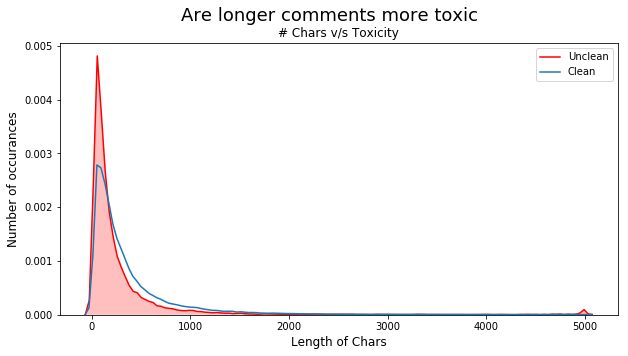

In [34]:
plt.figure(figsize = (10,5))
plt.suptitle('Are longer comments more toxic', fontsize = 18)
plt.tight_layout()

# Total lengths(chars)
ax = sns.kdeplot(train[train.clean_comment == 0].total_len, label = 'Unclean', shade = True, color = 'r')
ax = sns.kdeplot(train[train.clean_comment == 1].total_len, label = 'Clean')
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Length of Chars', fontsize=12)
plt.title("# Chars v/s Toxicity", fontsize=12)
plt.show()

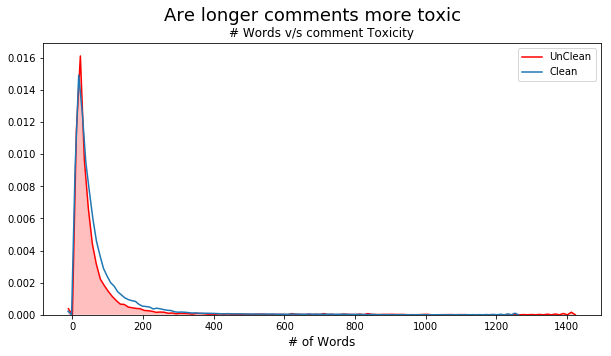

In [35]:
plt.figure(figsize = (10,5))
plt.suptitle('Are longer comments more toxic', fontsize = 18)
plt.tight_layout()

# words
ax = sns.kdeplot(train[train.clean_comment == 0].word_count, label="UnClean",shade=True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].word_count, label="Clean")
plt.legend()
plt.xlabel('# of Words', fontsize=12)
plt.title("# Words v/s comment Toxicity", fontsize=12)
plt.show()

- most comments are having less than 250 words

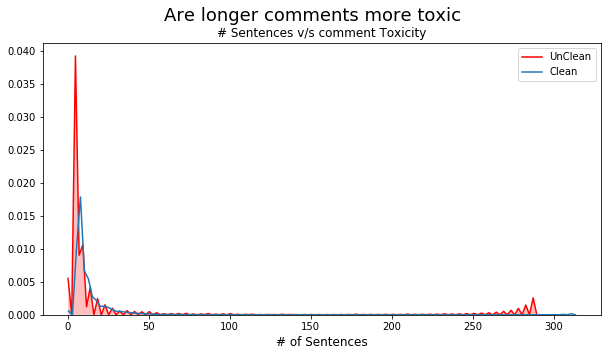

In [36]:
plt.figure(figsize = (10,5))
plt.suptitle('Are longer comments more toxic', fontsize = 18)
plt.tight_layout()

## sentences
ax = sns.kdeplot(train[train.clean_comment == 0].sent_count, label="UnClean",shade= True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].sent_count, label="Clean",shade = False)
plt.legend()
plt.xlabel('# of Sentences', fontsize=12)
plt.title("# Sentences v/s comment Toxicity", fontsize=12)
plt.show()

- most comments are having less than 25 sentences

- unclean comments are having more number of words in less number of sentences.
- The distrubution plots of clean & unclean of all three plots are very much overlapping with each others, indicating these features are going to be less significant in differentiating them.

In [37]:
import string

#Captial letters:
train['capitals'] = train['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
test['capitals'] = test['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))

# punct count:
train['punct_count'] = train['comment_text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))
test['punct_count'] = test['comment_text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# smilies:
smilies = (':-)', ':)', ';-)', ';)')
train['smilies_count'] = train['comment_text'].apply(lambda comment: sum(comment.count(s) for s in smilies))
test['smilies_count'] = test['comment_text'].apply(lambda comment: sum(comment.count(s) for s in smilies))

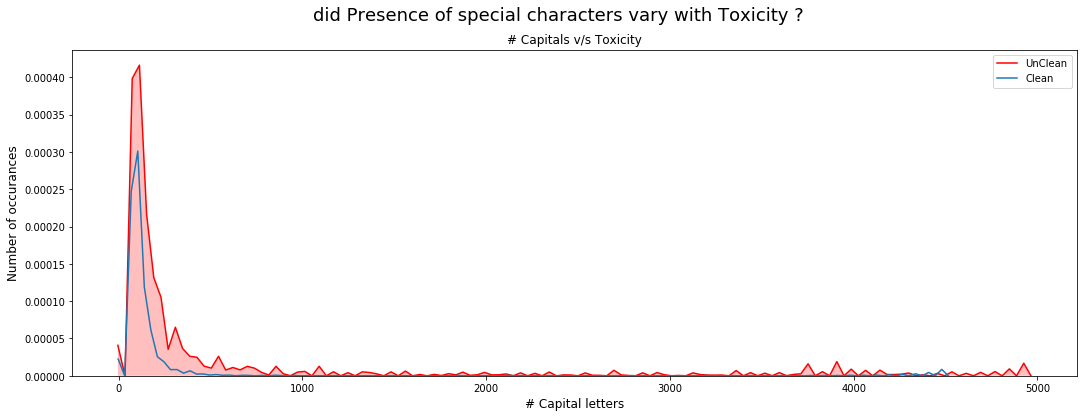

In [38]:
#----------plotting------------

plt.figure(figsize=(18,6))
plt.tight_layout()
plt.suptitle("did Presence of special characters vary with Toxicity ?\n",fontsize=18)

# words
ax = sns.kdeplot(train[train.clean_comment == 0].capitals, label="UnClean",shade=True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].capitals, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('# Capital letters', fontsize=12)
plt.title("# Capitals v/s Toxicity", fontsize=12)
plt.show()

- presence of captial letters is more in case of unclean comments, but the distributions are overlapping making it a difficult feature for models to extract information.

Text(0.5,1,'#Punctuations v/s comment Toxicity')

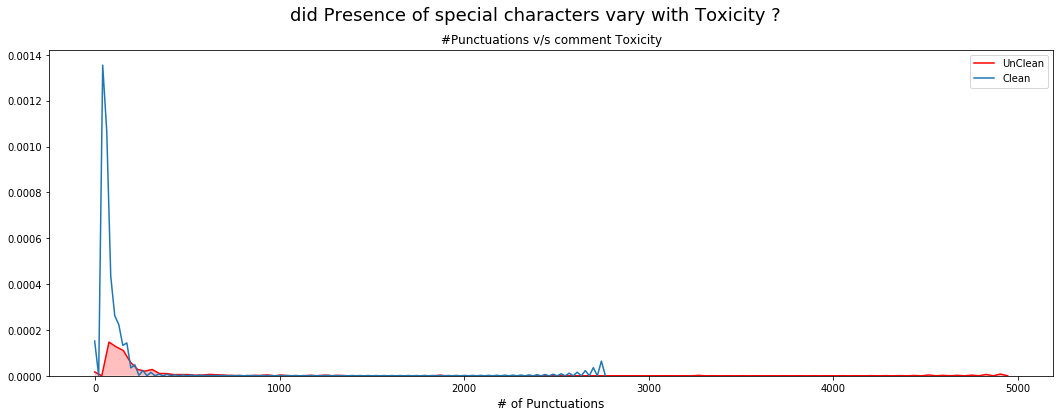

In [39]:
#----------plotting------------

plt.figure(figsize=(18,6))
plt.tight_layout()
plt.suptitle("did Presence of special characters vary with Toxicity ?\n",fontsize=18)

# words
ax = sns.kdeplot(train[train.clean_comment == 0].punct_count, label="UnClean",shade=True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].punct_count, label="Clean")
plt.legend()
plt.xlabel('# of Punctuations', fontsize=12)
plt.title("#Punctuations v/s comment Toxicity", fontsize=12)

Text(0.5,1,'#Smilies v/s comment Toxicity')

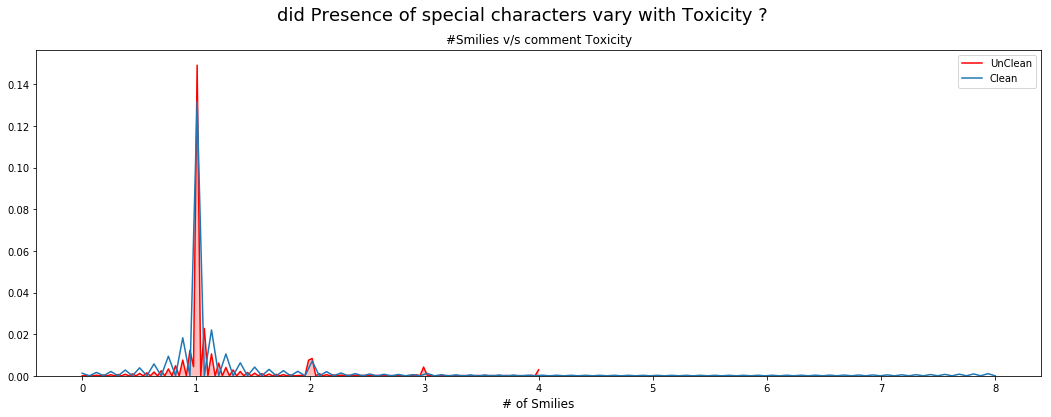

In [40]:
#----------plotting------------

plt.figure(figsize=(18,6))
plt.tight_layout()
plt.suptitle("did Presence of special characters vary with Toxicity ?\n",fontsize=18)

#sentences
ax = sns.kdeplot(train[train.clean_comment == 0].smilies_count, label="UnClean",shade=True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].smilies_count, label="Clean")
plt.legend()
plt.xlabel('# of Smilies', fontsize=12)
plt.title("#Smilies v/s comment Toxicity", fontsize=12)

- most of the clean comments are having punctuations less than 100 while for unclean comments it spread to max of 5000 punctuations.
- no.of smilies in unclean v/s clean comments is very much similar and unclean comments are having more comments with no.of smilies = 1.

In [41]:
#Unique word count:
train['unique_word_count'] = train["comment_text"].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test["comment_text"].apply(lambda x: len(set(str(x).split())))

#Unique ratio:
train['unique_word_percent'] = train['unique_word_count']/train['word_count'] * 100
test['unique_word_percent'] = test['unique_word_count']/test['word_count'] * 100

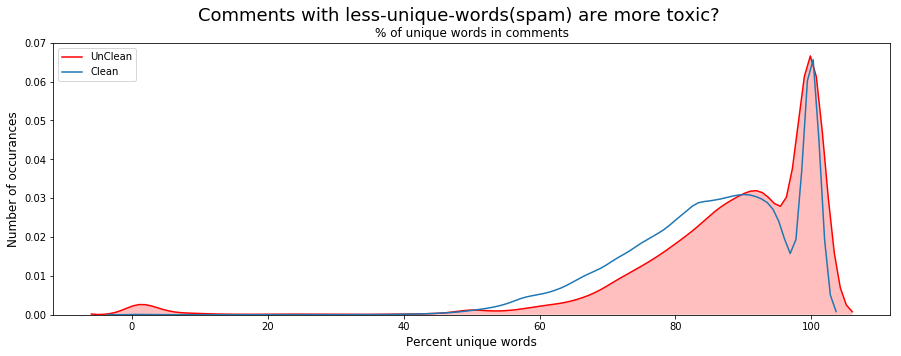

In [42]:
#----------plotting------------

# comments with unique word count percentage < 25%...they can be spam/referal links/marketing links

plt.figure(figsize=(15,5))
plt.suptitle("Comments with less-unique-words(spam) are more toxic?",fontsize = 18)


plt.title("% of unique words in comments")
ax = sns.kdeplot(train[train.clean_comment == 0].unique_word_percent, label="UnClean",shade=True,color='r')
ax = sns.kdeplot(train[train.clean_comment == 1].unique_word_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)
plt.show()

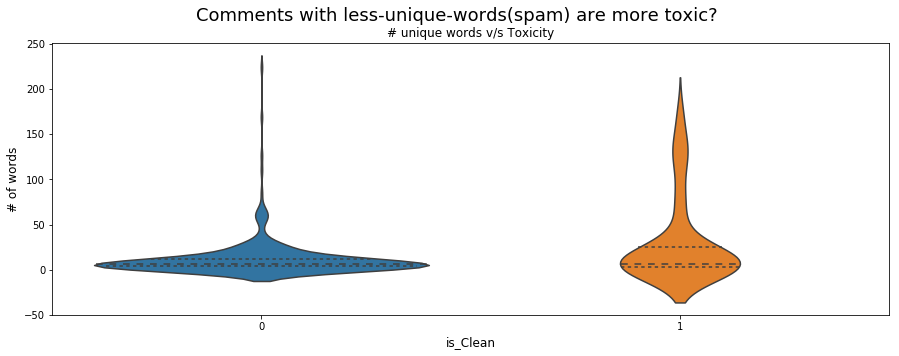

In [43]:
#----------plotting------------

# comments with unique word count percentage < 25%...they can be spam/referal links/marketing links

plt.figure(figsize=(15,5))
plt.suptitle("Comments with less-unique-words(spam) are more toxic?",fontsize = 18)

sns.violinplot(y = 'unique_word_count',x='clean_comment', data = train[train['unique_word_percent'] < 25], 
               split=True,inner="quart")
plt.xlabel('is_Clean', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("# unique words v/s Toxicity")
plt.show()

# train_df[train_df['word_unique_percent'] < 25]

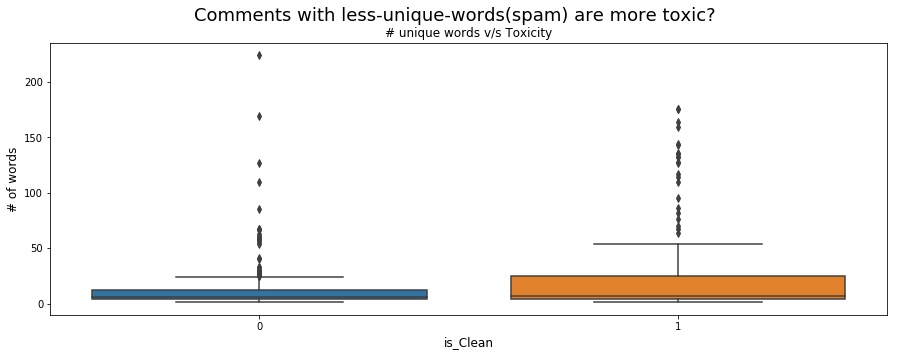

In [105]:
#----------plotting------------

# comments with unique word count percentage < 25%...they can be spam/referal links/marketing links

plt.figure(figsize=(15,5))
plt.suptitle("Comments with less-unique-words(spam) are more toxic?",fontsize = 18)

sns.boxplot(y = 'unique_word_count',x='clean_comment', data = train[train['unique_word_percent'] < 25])
plt.xlabel('is_Clean', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("# unique words v/s Toxicity")
plt.show()

# train_df[train_df['word_unique_percent'] < 25]

- There is a wide spread area for unclean points in the unique word percentage range of 1-10%, Interesting there are clean comments as well with lesser number of unique words. 
- This feature seems carry some significance especially incase of sentences with less unique words.


#### lets once see how text in clean-spam & unclean-spam comments look like

In [44]:
## lets have a look how clean & unclean spam comment looks like

print("Clean Spam example:")
print(train[train['unique_word_percent'] < 10][train['clean_comment'] == 1].comment_text.iloc[0])
print('-'*190)
print("Toxic Spam example:")
print(train[train['unique_word_percent'] < 10][train['clean_comment'] == 0].comment_text.iloc[25])

Clean Spam example:
EPIC FAIL!
EPIC FAIL
EPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAILEPIC FAIL!
EPIC FAI

C:\Users\Shendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Shendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [107]:
train[train['unique_word_percent'] < 10][train['clean_comment'] == 1].iloc[0]

C:\Users\Shendy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


id                                                      136a5aade6069d36
comment_text           EPIC FAIL!\nEPIC FAIL\nEPIC FAIL!\nEPIC FAILEP...
toxic                                                                  0
severe_toxic                                                           0
obscene                                                                0
threat                                                                 0
insult                                                                 0
identity_hate                                                          0
clean_comment                                                          1
total_len                                                           1301
sent_count                                                            67
word_count                                                           197
capitals                                                            1040
punct_count                                        

- we definitely need to penalize the over repeating words (or) there will be chance for models to learn as words like 'George Bush' as indicator as toxicity. so comments with lesser unique words should be preprocessed carefully.

- Tfidf is well known for this penalizing effect.
-  TF-IDF Vectorizer
      - TF - Term Frequency -- Count of the words(Terms) in the text corpus (same of Count Vect)
      - IDF - Inverse Document Frequency -- Penalizes words that are too frequent. We can think of this as regularization

In [45]:
def get_topn_tfidf_feat_byClass(X_tfidf, y_train, feature_names, labels, topn):
    
    feat_imp_dfs = {}
    
    for label in labels:
        # get indices of rows where label is true
        label_ids = y_train.index[y_train[label] == 1]
        # get subset of rows
        label_rows = X_tfidf[label_ids].toarray()
        # calc mean feature importance
        feat_imp = label_rows.mean(axis = 0)
        # sort by column dimension and get topn feature indices
        topn_ids = np.argsort(feat_imp)[::-1][:topn]
        # combine tfidf value with feature name
        topn_features = [(feature_names[i], feat_imp[i]) for i in topn_ids]
        # df
        topn_df = pd.DataFrame(topn_features, columns = ['word_feature', 'tfidf_value'])
        # save 
        feat_imp_dfs[label] = topn_df
    return feat_imp_dfs

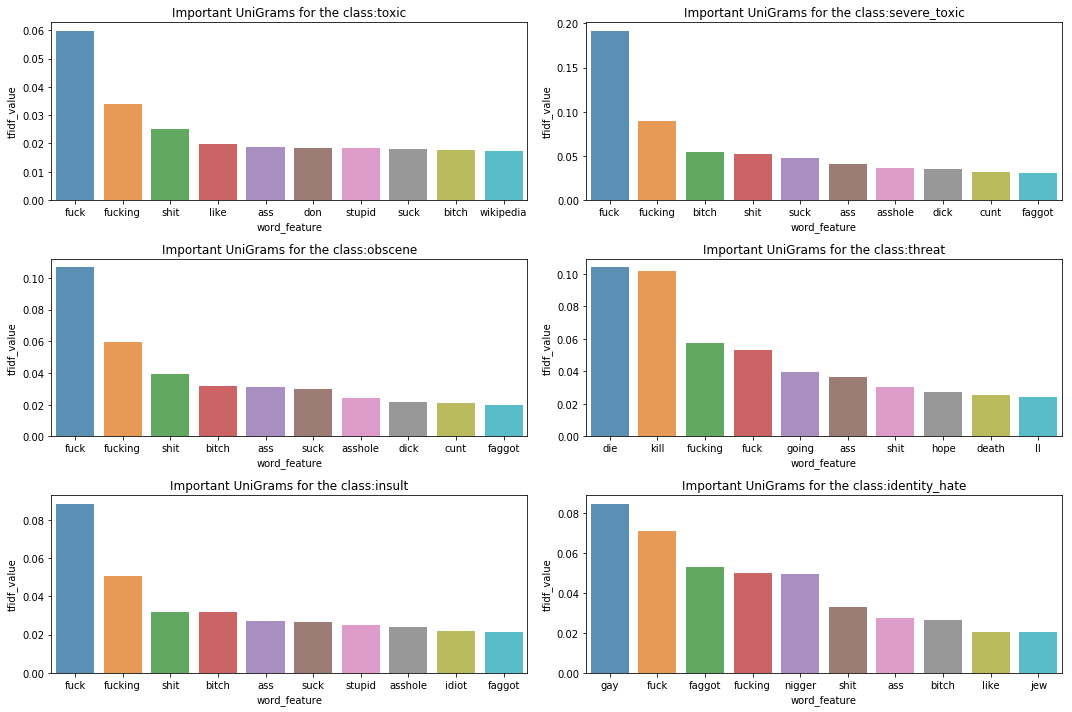

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize # Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer


tfidf = TfidfVectorizer(ngram_range = (1,1), min_df = 100, 
                        strip_accents = 'unicode', analyzer='word',
                        use_idf = 1,smooth_idf = 1,sublinear_tf = 1,
                        stop_words = 'english')
X_unigrams = tfidf.fit_transform(train['comment_text'])
X_unigrams.shape, len(tfidf.get_feature_names())


feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_unigrams, train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,10))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i + 1)
    sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Important UniGrams for the class:{}".format(label))
    plt.tight_layout()

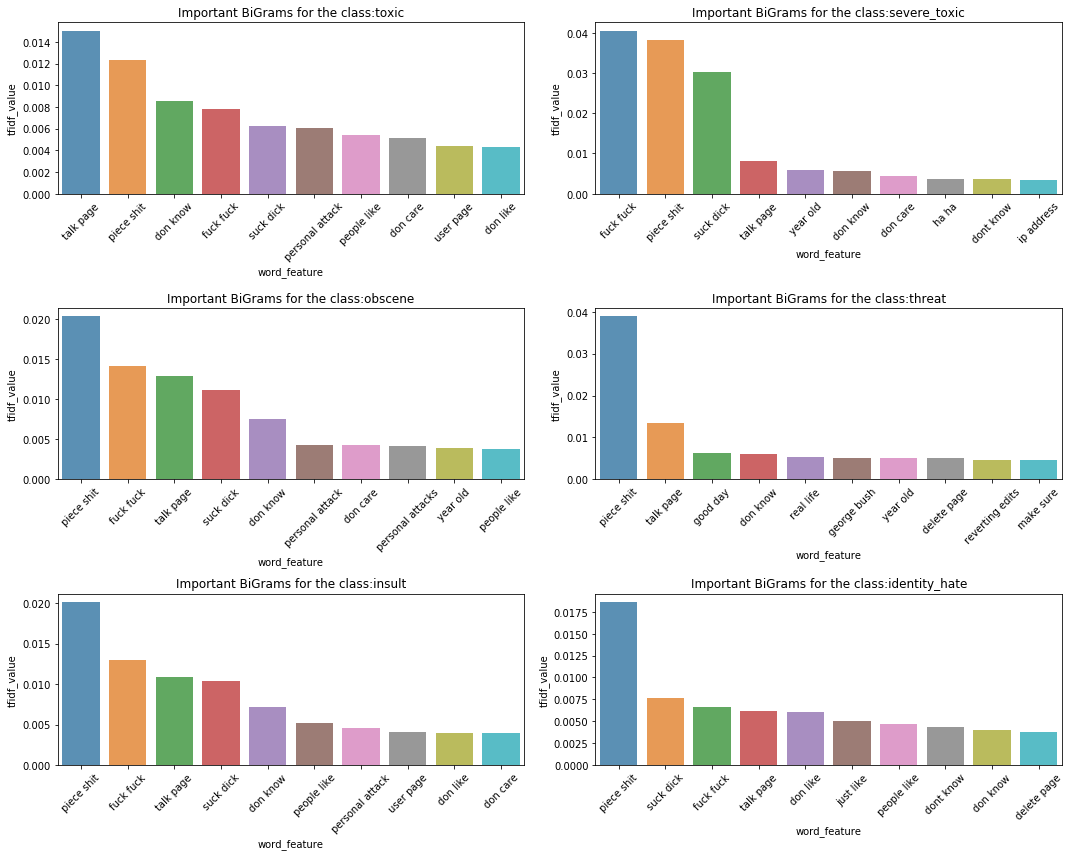

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (2,2), min_df = 100, 
                        strip_accents = 'unicode', analyzer = 'word',
                        use_idf = 1,smooth_idf = 1,sublinear_tf = 1,
                        stop_words = 'english')
X_bigrams = tfidf.fit_transform(train['comment_text'])
X_bigrams.shape, len(tfidf.get_feature_names())

feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_bigrams, train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,12))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i + 1)
    by_class = sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Important BiGrams for the class:{}".format(label))
    for item in by_class.get_xticklabels():
        item.set_rotation(45)
    plt.tight_layout()

- the top 10 tfidf features in case are not much differentiating, every class are having almost same phrases.
- few words like `fuck` seems to be in every class, but again as this is multi-label classification (multiple tags for each comment) there will be that overlapping.
- especially `threat` class is standing apart with words like `kill`, `die`, `death`.
- Interestingly, due to high tf-idf value, word `wikipedia` has stands in top10 features for the `toxic` class. which model should not learn.